In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import numpy as np

In [3]:
#defining our 3 layer nueral net
"""input_size = 1
hidden_width = 2
w1 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)
bias1 = torch.randn(1,hidden_width, requires_grad = True).type(torch.FloatTensor)
w2 = torch.randn(hidden_width, hidden_width, requires_grad = True).type(torch.FloatTensor)
bias2 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)
w3 = torch.randn(hidden_width, 1, requires_grad = True).type(torch.FloatTensor)
bias3 = torch.randn(1, 1, requires_grad = True).type(torch.FloatTensor)"""

'input_size = 1\nhidden_width = 2\nw1 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)\nbias1 = torch.randn(1,hidden_width, requires_grad = True).type(torch.FloatTensor)\nw2 = torch.randn(hidden_width, hidden_width, requires_grad = True).type(torch.FloatTensor)\nbias2 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)\nw3 = torch.randn(hidden_width, 1, requires_grad = True).type(torch.FloatTensor)\nbias3 = torch.randn(1, 1, requires_grad = True).type(torch.FloatTensor)'

In [127]:
def f(x):
    return x**2 + torch.from_numpy(np.random.normal(0,1,size=(len(x),1))).float()

#defining our input
x = torch.randn(100,1)
target = f(x)
print(x, target)

tensor([[ 1.2926],
        [-1.0809],
        [-0.6967],
        [-1.9664],
        [ 0.0164],
        [ 0.7850],
        [-0.7287],
        [-0.1102],
        [ 0.0913],
        [ 2.1686],
        [ 0.4368],
        [-0.8047],
        [ 0.4889],
        [-0.2579],
        [ 0.1383],
        [ 0.2451],
        [-1.9011],
        [-0.4052],
        [-0.7673],
        [ 0.2781],
        [-2.5350],
        [ 0.3958],
        [-0.7195],
        [-2.0180],
        [-0.2718],
        [ 0.3382],
        [ 2.3041],
        [-0.9738],
        [ 0.3105],
        [ 0.3324],
        [ 0.2976],
        [ 0.2263],
        [-1.4276],
        [-0.7004],
        [ 0.7921],
        [ 0.3943],
        [ 0.9189],
        [-0.8979],
        [ 0.0471],
        [-1.2451],
        [-0.5912],
        [ 0.2538],
        [ 0.0324],
        [-0.4613],
        [ 0.1077],
        [-2.5529],
        [-0.3014],
        [-1.5508],
        [ 0.6356],
        [-1.0535],
        [ 2.3770],
        [ 1.0381],
        [-1.

In [128]:
target.shape

torch.Size([100, 1])

In [133]:
#neural network
if 0:
    #choosing whether we want to have our variables randomly initialized or not
    input_size = 1
    hidden_width = 10
    w1 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)
    bias1 = torch.randn(1,hidden_width, requires_grad = True).type(torch.FloatTensor)
    w2 = torch.randn(hidden_width, hidden_width, requires_grad = True).type(torch.FloatTensor)
    bias2 = torch.randn(1, hidden_width, requires_grad = True).type(torch.FloatTensor)
    w3 = torch.randn(hidden_width, 1, requires_grad = True).type(torch.FloatTensor)
    bias3 = torch.randn(1, 1, requires_grad = True).type(torch.FloatTensor)

iterations = 1000
learning_rate = .01
for i in range(iterations):
    #Forward pass
    act1 = (x @ w1) + bias1 
    act2 = F.leaky_relu(act1)
    act3 = (act2 @ w2) + bias2
    act4 = F.leaky_relu(act3)
    act5 = (act4 @ w3) + bias3
    preds = F.leaky_relu(act5)
    
    #Defining our loss fcn
    #loss = F.mse_loss(preds,target)
    #print(loss)
    acc = nn.MSELoss()
    acc = acc(preds,target)
    print(acc)
    #This computes the gradients w.r.t. all the other variables
    acc.backward()
    print()
    
    #Gradient Descent - backprop
    with torch.no_grad():
        w1 += w1.grad * -learning_rate
        bias1 += bias1.grad * -learning_rate
        w2 += w2.grad * -learning_rate
        bias2 += bias2.grad * -learning_rate
        w3 += w3.grad * -learning_rate
        bias3 += bias3.grad * -learning_rate
        #reset the gradient to 0 so future results are accurate, Super Important Step!!!
        w1.grad.zero_() 
        bias1.grad.zero_()
        w2.grad.zero_() 
        bias2.grad.zero_()
        w3.grad.zero_() 
        bias3.grad.zero_()

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0114, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0114, grad_fn=<MseLossBackward>)

tensor(1.0117, grad_fn=<MseLossBackward>)

tensor(1.0118, grad_fn=<MseLossBackward>)

tensor(1.0116, grad_fn=<MseLossBackward>)

tensor(1.0115, grad_fn=<MseLossBackward>)

tensor(1.0114, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0114, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0112, grad_fn=<MseLossBackward>)

tensor(1.0114, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0113, grad_fn=<MseLossBackward>)

tensor(1.0117, grad_fn=<MseLossBackward>)

tensor(1.01

In [59]:
for i in range(len(preds)):
    print(preds[i],target[i])
    print()

tensor([-0.0029], grad_fn=<SelectBackward>) tensor([-0.0062])

tensor([0.3873], grad_fn=<SelectBackward>) tensor([0.3970])

tensor([0.6840], grad_fn=<SelectBackward>) tensor([0.6895])

tensor([0.1735], grad_fn=<SelectBackward>) tensor([0.1658])

tensor([0.3351], grad_fn=<SelectBackward>) tensor([0.3313])

tensor([0.8862], grad_fn=<SelectBackward>) tensor([0.8488])

tensor([0.1389], grad_fn=<SelectBackward>) tensor([0.1321])

tensor([1.0009], grad_fn=<SelectBackward>) tensor([0.9667])

tensor([-0.0038], grad_fn=<SelectBackward>) tensor([-0.0011])

tensor([0.4575], grad_fn=<SelectBackward>) tensor([0.4755])

tensor([0.4778], grad_fn=<SelectBackward>) tensor([0.5113])

tensor([1.3535], grad_fn=<SelectBackward>) tensor([1.3487])

tensor([0.3791], grad_fn=<SelectBackward>) tensor([0.4140])

tensor([2.3133], grad_fn=<SelectBackward>) tensor([2.2972])

tensor([0.5994], grad_fn=<SelectBackward>) tensor([0.5873])

tensor([0.2604], grad_fn=<SelectBackward>) tensor([0.2475])

tensor([-0.0026], gr

In [5]:
preds[0].item()

2.122009038925171

In [134]:
inputs = np.linspace(-3,3,100)
#[-3]
#for i in range(1,601):
#    inputs.append(-3 + i*.01)

In [135]:
inputs.shape

(100,)

In [136]:
nnpreds = np.array(inputs)

In [137]:
nnpreds = np.reshape(nnpreds, (100,1))

In [138]:
nnpreds = torch.from_numpy(nnpreds)
#nnpreds.float()

In [139]:
act1 = (nnpreds.float() @ w1) + bias1 
act2 = F.leaky_relu(act1)
act3 = (act2 @ w2) + bias2
act4 = F.leaky_relu(act3)
act5 = (act4 @ w3) + bias3
nnpreds = F.leaky_relu(act5)

In [140]:
nnpreds = nnpreds.detach().numpy()

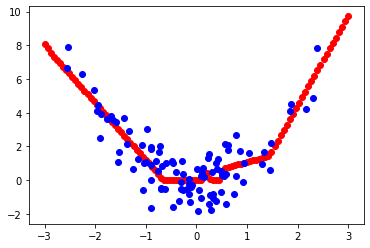

In [141]:
import matplotlib.pyplot as plt
plt.scatter(inputs, nnpreds, color = 'red')
plt.scatter(x, target, color = 'blue')

In [123]:
print(x.shape)
print(target.shape)

torch.Size([100, 1])
torch.Size([100, 100])


## Using 100% PyTorch and not hardcoding it

In [6]:
from torch import optim

In [46]:
#Define our model and everything needed
model = nn.Sequential(
    nn.Linear(1,10), nn.LeakyReLU(),
    nn.Linear(10,10), nn.LeakyReLU(),
    nn.Linear(10,1), nn.LeakyReLU(),
)

loss = nn.MSELoss()
params = model.parameters()
optimizer = optim.Adam(params,lr = .001)

In [49]:
#Training loop
epochs = 1000

for epoch in range(epochs):
    #Forward
    yhat = model(x)
    #Loss
    acc = loss(yhat,target)
    #Deleting any accumulated gradients
    model.zero_grad()
    #Backprop
    acc.backward()
    #Optimize
    optimizer.step()
    print(acc)

tensor(0.3030, grad_fn=<MseLossBackward>)
tensor(0.3029, grad_fn=<MseLossBackward>)
tensor(0.3028, grad_fn=<MseLossBackward>)
tensor(0.3028, grad_fn=<MseLossBackward>)
tensor(0.3027, grad_fn=<MseLossBackward>)
tensor(0.3026, grad_fn=<MseLossBackward>)
tensor(0.3026, grad_fn=<MseLossBackward>)
tensor(0.3025, grad_fn=<MseLossBackward>)
tensor(0.3024, grad_fn=<MseLossBackward>)
tensor(0.3024, grad_fn=<MseLossBackward>)
tensor(0.3023, grad_fn=<MseLossBackward>)
tensor(0.3022, grad_fn=<MseLossBackward>)
tensor(0.3021, grad_fn=<MseLossBackward>)
tensor(0.3021, grad_fn=<MseLossBackward>)
tensor(0.3020, grad_fn=<MseLossBackward>)
tensor(0.3019, grad_fn=<MseLossBackward>)
tensor(0.3018, grad_fn=<MseLossBackward>)
tensor(0.3018, grad_fn=<MseLossBackward>)
tensor(0.3017, grad_fn=<MseLossBackward>)
tensor(0.3016, grad_fn=<MseLossBackward>)
tensor(0.3016, grad_fn=<MseLossBackward>)
tensor(0.3015, grad_fn=<MseLossBackward>)
tensor(0.3014, grad_fn=<MseLossBackward>)
tensor(0.3013, grad_fn=<MseLossBac

In [50]:
print(yhat)

tensor([[ 0.2681],
        [-0.2169],
        [ 1.9691],
        [-0.2148],
        [-0.2155],
        [-0.2138],
        [-0.0338],
        [-0.1982],
        [ 0.1705],
        [-0.2096],
        [-0.2171],
        [-0.1449],
        [-0.0307],
        [-0.1608],
        [-0.2172],
        [-0.0583],
        [-0.0375],
        [-0.2172],
        [-0.2170],
        [-0.1645],
        [-0.2148],
        [-0.2171],
        [-0.1203],
        [-0.1782],
        [-0.2132],
        [-0.1139],
        [-0.1696],
        [ 1.7860],
        [-0.0215],
        [ 4.9855],
        [-0.1010],
        [ 1.1187],
        [-0.2121],
        [ 1.2977],
        [-0.1388],
        [-0.1256],
        [-0.2173],
        [-0.2150],
        [ 5.3937],
        [ 0.0979],
        [-0.2077],
        [-0.0668]], grad_fn=<LeakyReluBackward0>)


In [51]:
print(target)

tensor([[ 0.3776],
        [-0.8405],
        [ 1.7598],
        [-0.8077],
        [-0.8247],
        [-0.7911],
        [ 0.0352],
        [-0.7615],
        [ 0.4363],
        [-0.7673],
        [-0.8229],
        [-0.5523],
        [ 0.0561],
        [-0.6387],
        [-0.8336],
        [-0.1217],
        [ 0.0943],
        [-0.8384],
        [-0.8411],
        [-0.6228],
        [-0.8105],
        [-0.8229],
        [-0.4496],
        [-0.6672],
        [-0.7866],
        [-0.4177],
        [-0.6728],
        [ 1.6183],
        [ 0.1193],
        [ 5.0245],
        [-0.3452],
        [ 1.0760],
        [-0.7804],
        [ 1.1728],
        [-0.5284],
        [-0.4732],
        [-0.8273],
        [-0.8133],
        [ 5.4387],
        [ 0.2845],
        [-0.7570],
        [-0.1725]])


In [52]:
from torchvision.datasets import MNIST

In [53]:
dataset = MNIST(root='data/', download=True) 

0it [00:00, ?it/s]

HTTPError: HTTP Error 503: Service Unavailable